**Submitted by:-**

**NAME:- TANISHA BANSAL**

**BATCH:- CSE-AI - 2 (2026)**

**ROLL NO.:- 14301172022**

**COURSE:- DEEP LEARNING PRACTICALS - EXPERIMENT 5**

**AIM:- Write a program to implement simple convolutional neural network for image classification.**

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         102,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 56s 57ms/step - accuracy: 0.8857 - loss: 0.3790 - val_accuracy: 0.9807 - val_loss: 0.0598
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 77s 52ms/step - accuracy: 0.9839 - loss: 0.0511 - val_accuracy: 0.9848 - val_loss: 0.0506
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 81s 51ms/step - accuracy: 0.9883 - loss: 0.0373 - val_accuracy: 0.9871 - val_loss: 0.0416
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 80s 50ms/step - accuracy: 0.9925 - loss: 0.0267 - val_accuracy: 0.9896 - val_loss: 0.0286
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 83s 51ms/step - accuracy: 0.9926 - loss: 0.0220 - val_accuracy: 0.9879 - val_loss: 0.0344


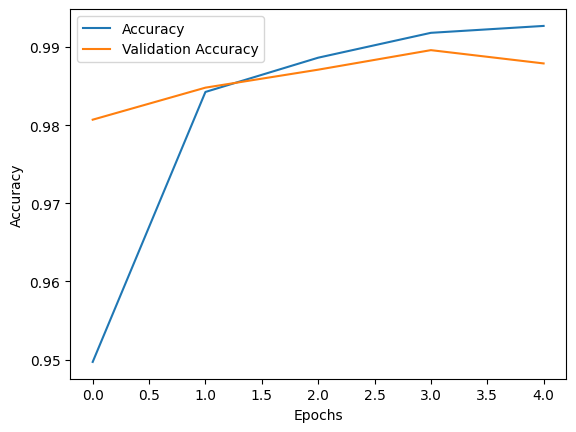

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Loading and preprocessing the MNIST dataset
def load_data():
    (x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
    # Normalizing pixel values to be between 0 and 1
    x_train = x_train.astype("float32") / 255.0
    x_test = x_test.astype("float32") / 255.0
    # Reshaping data to include channel dimension
    x_train = x_train[..., tf.newaxis]
    x_test = x_test[..., tf.newaxis]
    return x_train, y_train, x_test, y_test

# Defining a simple CNN model
def create_model():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')  # 10 classes for digits 0-9
    ])
    return model

# Compiling and training the model
def train_model(model, x_train, y_train, x_test, y_test):
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    history = model.fit(x_train, y_train, epochs=5,
                        validation_data=(x_test, y_test), batch_size=64)
    return history

# Ploting training results
def plot_training(history):
    plt.plot(history.history['accuracy'], label='Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

# This is the Main function
def main():
    x_train, y_train, x_test, y_test = load_data()
    model = create_model()
    model.summary()
    history = train_model(model, x_train, y_train, x_test, y_test)
    plot_training(history)

if __name__ == "__main__":
    main()
